In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

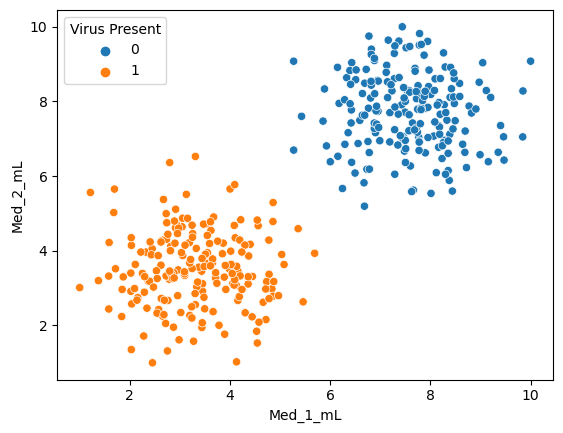

In [4]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

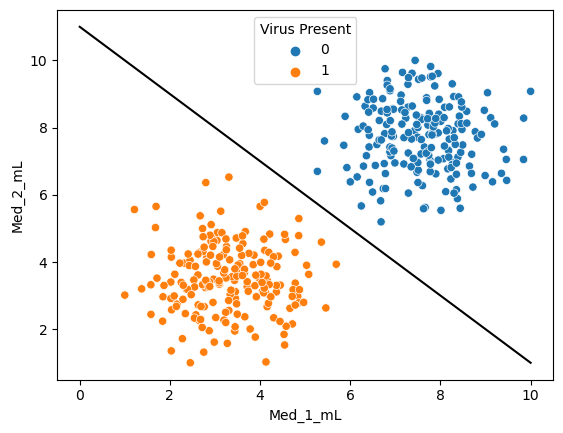

In [8]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

# creating a hyperplane (manually plotting hyperplane)
x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b
plt.plot(x,y,'black')

In [9]:
# using sklearn
from sklearn.svm import SVC

In [11]:
#help(SVC)

In [12]:
# to keep it simple we don't do any train test split,scaling 
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']

In [13]:
model=SVC(kernel='linear',C=1000)

In [14]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [16]:
from svm_margin_plot import plot_svm_boundary

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


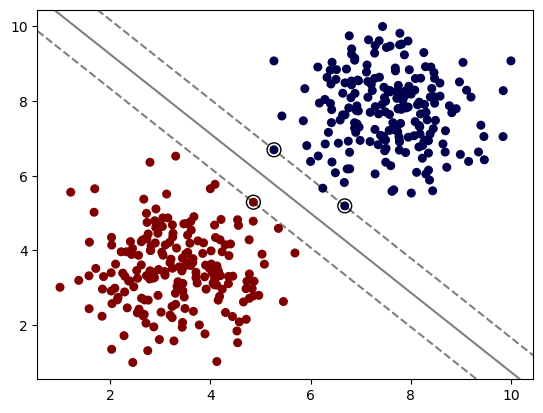

In [17]:
plot_svm_boundary(model,X,y)

# testing model for different 'kernel' computation

* 1) Kernel=linear

In [19]:
model=SVC(kernel='linear',C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


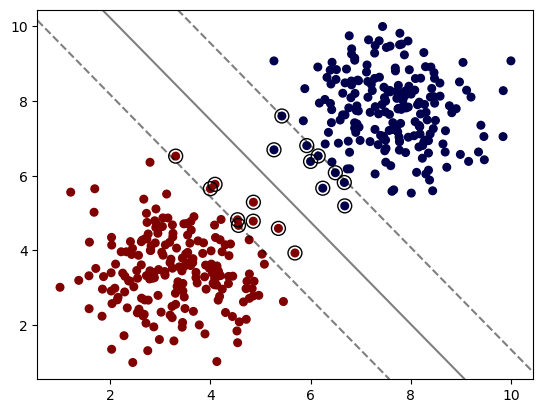

In [20]:
plot_svm_boundary(model,X,y)

# as 'c' decreases , margin gets bigger and allows for more misclassification

* 2. kernel=rbf

In [21]:
model=SVC(kernel='rbf',C=1)

In [22]:
model.fit(X,y)

SVC(C=1)

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


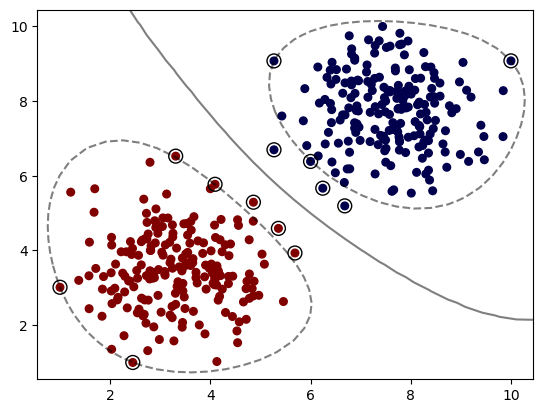

In [23]:
plot_svm_boundary(model,X,y)

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


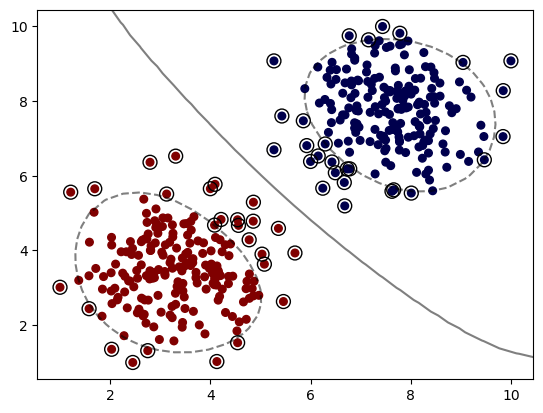

In [26]:
model=SVC(kernel='rbf',C=0.1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


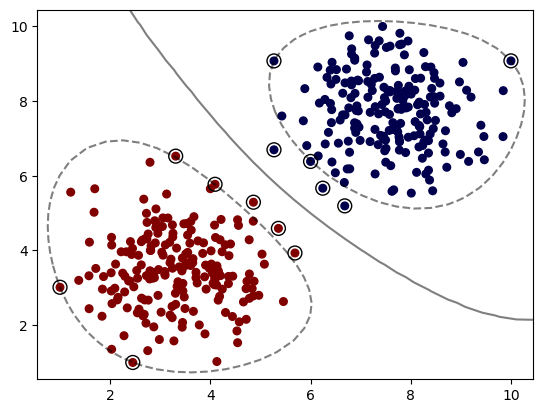

In [27]:
model=SVC(kernel='rbf',C=1,gamma='scale')
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


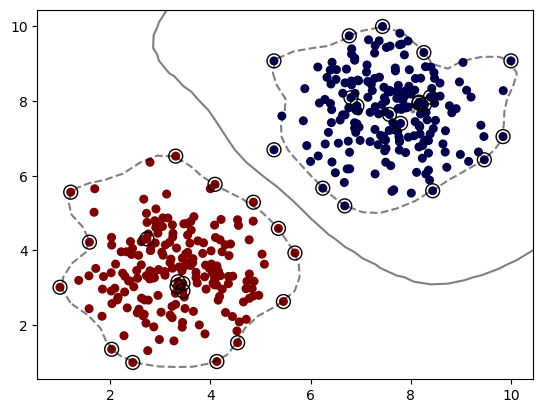

In [28]:
model=SVC(kernel='rbf',C=1,gamma='auto')
model.fit(X,y)
plot_svm_boundary(model,X,y)

* 3. kernel=sigmoid

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


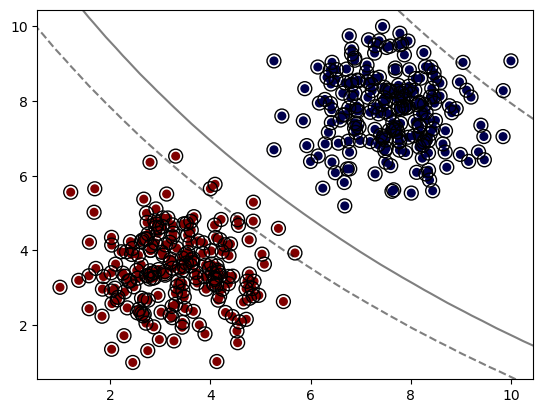

In [29]:
model=SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model,X,y) # this shows that it is overfitting

* 4. kernel=poly

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


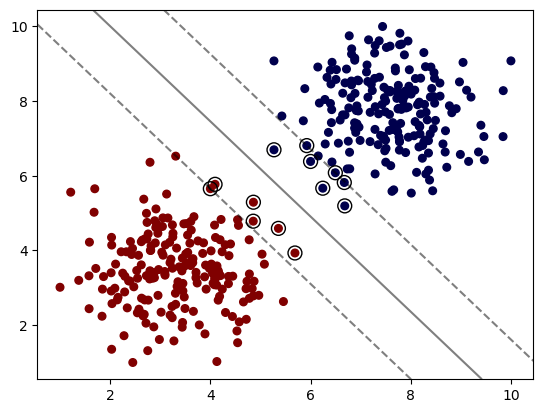

In [30]:
model=SVC(kernel='poly',C=1,degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

C:\Users\sanjay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


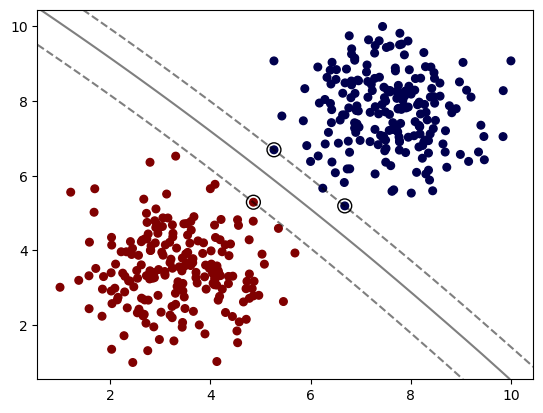

In [33]:
model=SVC(kernel='poly',C=0.05,degree=4)
model.fit(X,y)
plot_svm_boundary(model,X,y)

# cross validation to select best parameters

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
svm=SVC()
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [36]:
grid=GridSearchCV(svm,param_grid)

In [37]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [38]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}